## Importing the various packages we'll require

In [70]:
import pandas as pd
import numpy as np
import datetime
df = pd.read_csv("sampled_flights_total.csv")

C:\Users\Kristopher\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Quick rundown of the dtypes we're working with 

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997830 entries, 0 to 1997829
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   fl_date              object 
 1   mkt_unique_carrier   object 
 2   branded_code_share   object 
 3   mkt_carrier          object 
 4   mkt_carrier_fl_num   int64  
 5   op_unique_carrier    object 
 6   tail_num             object 
 7   op_carrier_fl_num    int64  
 8   origin_airport_id    int64  
 9   origin               object 
 10  origin_city_name     object 
 11  dest_airport_id      int64  
 12  dest                 object 
 13  dest_city_name       object 
 14  crs_dep_time         int64  
 15  dep_time             float64
 16  dep_delay            float64
 17  taxi_out             float64
 18  wheels_off           float64
 19  wheels_on            float64
 20  taxi_in              float64
 21  crs_arr_time         int64  
 22  arr_time             float64
 23  arr_delay            float64
 24

In [72]:
df['dep_delay'].replace('', np.nan, inplace=True)

In [73]:
df['dep_delay'].isna().mean()

0.01677820435172162

- About 1.67% of our values are empty - these flights were cancelled, so we'll drop them for this analysis

In [74]:
df.dropna(subset=['dep_delay'], inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964310 entries, 0 to 1997829
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   fl_date              object 
 1   mkt_unique_carrier   object 
 2   branded_code_share   object 
 3   mkt_carrier          object 
 4   mkt_carrier_fl_num   int64  
 5   op_unique_carrier    object 
 6   tail_num             object 
 7   op_carrier_fl_num    int64  
 8   origin_airport_id    int64  
 9   origin               object 
 10  origin_city_name     object 
 11  dest_airport_id      int64  
 12  dest                 object 
 13  dest_city_name       object 
 14  crs_dep_time         int64  
 15  dep_time             float64
 16  dep_delay            float64
 17  taxi_out             float64
 18  wheels_off           float64
 19  wheels_on            float64
 20  taxi_in              float64
 21  crs_arr_time         int64  
 22  arr_time             float64
 23  arr_delay            float64
 24

#### Creating a column titled "total_delay"

##### - This is a the difference between departure delay, and arrival delay

In [76]:
df['total_delay'] = df['dep_delay'] - df['arr_delay']
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,total_delay
0,2019-11-11,WN,WN,WN,410,WN,N7842A,410,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,2019-11-11,WN,WN,WN,2149,WN,N420WN,2149,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


#### There's no real outliers with this data unfortunately, except maybe values above and below 450 minutes in total delay.

#### - We'll remove those initially for this exploratory analysis

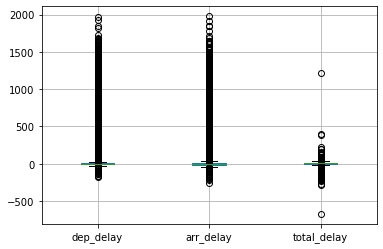

In [77]:
boxplot = df.boxplot(column=['dep_delay', 'arr_delay', 'total_delay'])


In [92]:
indexNames = df[df['total_delay'] <= -350].index
indexNames1 = df[df['total_delay'] >=350].index

In [93]:
print(indexNames, indexNames1)

Int64Index([262756], dtype='int64') Int64Index([491871, 864683, 1716700], dtype='int64')


In [94]:
df.drop(indexNames, inplace=True)

In [96]:
df.drop(indexNames1, inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964306 entries, 0 to 1997829
Data columns (total 43 columns):
 #   Column               Dtype  
---  ------               -----  
 0   fl_date              object 
 1   mkt_unique_carrier   object 
 2   branded_code_share   object 
 3   mkt_carrier          object 
 4   mkt_carrier_fl_num   int64  
 5   op_unique_carrier    object 
 6   tail_num             object 
 7   op_carrier_fl_num    int64  
 8   origin_airport_id    int64  
 9   origin               object 
 10  origin_city_name     object 
 11  dest_airport_id      int64  
 12  dest                 object 
 13  dest_city_name       object 
 14  crs_dep_time         int64  
 15  dep_time             float64
 16  dep_delay            float64
 17  taxi_out             float64
 18  wheels_off           float64
 19  wheels_on            float64
 20  taxi_in              float64
 21  crs_arr_time         int64  
 22  arr_time             float64
 23  arr_delay            float64
 24

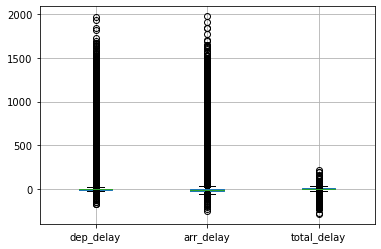

In [98]:
boxplot = df.boxplot(column=['dep_delay', 'arr_delay', 'total_delay'])

#### Next we're creating columns with the year, month, and day for each flight to make them easier to work with

In [99]:
df['year'] = pd.DatetimeIndex(df['fl_date']).year
df['month'] = pd.DatetimeIndex(df['fl_date']).month
df['day'] = pd.DatetimeIndex(df['fl_date']).day

In [100]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,total_delay,year,month,day
0,2019-11-11,WN,WN,WN,410,WN,N7842A,410,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2019,11,11
1,2019-11-11,WN,WN,WN,2149,WN,N420WN,2149,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2019,11,11


#### Create a new DF which consists of the month, and day aggregated values for 2018, and 2019, which we then take the average of, to find the daily average delay

In [101]:
month_day = round(df.groupby(['month', 'day'])[['total_delay']].mean(),2)

In [103]:
month_day.to_csv('month_day_avgs.csv')

In [106]:
month_day

total_delay
month day             
1     1           6.00
      2           5.05
      3           6.44
      4           7.19
      5           6.39
...                ...
12    27          5.42
      28          4.80
      29          5.95
      30          6.23
      31          6.55

[365 rows x 1 columns]

#### Here we're creating df's to calculate the monthly mean and median total delay

In [107]:
monthly_mean_total = round(df.groupby(['month'])[['total_delay']].mean(),2)
monthly_med_total = df.groupby(['month'])[['total_delay']].median()

#### We can see that monthly mean and median  totals are fairly consistent throughout the year. 

In [108]:
monthly_mean_total

,total_delay
month,
1,5.80
2,4.89
3,5.55
4,5.17
5,4.77
6,4.14
7,4.75
8,4.30
9,5.13


In [109]:
monthly_med_total

,total_delay
month,
1,7.0
2,6.0
3,7.0
4,6.0
5,6.0
6,6.0
7,6.0
8,6.0
9,7.0


#### Here we're going to take a look at the departure delay, and the arrival delay, in a similar way as above

In [110]:
monthly_mean_dep = round(df.groupby(['month'])[['dep_delay']].mean(),2)
monthly_med_dep = df.groupby(['month'])[['dep_delay']].median()
monthly_mean_arr = round(df.groupby(['month'])[['arr_delay']].mean(),2)
monthly_med_arr = df.groupby(['month'])[['arr_delay']].median()

In [111]:
monthly_mean_dep

,dep_delay
month,
1,10.00
2,11.89
3,8.31
4,9.49
5,11.50
6,14.52
7,13.92
8,13.27
9,7.00


In [112]:
monthly_med_dep

,dep_delay
month,
1,-3.0
2,-2.0
3,-2.0
4,-3.0
5,-2.0
6,-1.0
7,-2.0
8,-2.0
9,-3.0


In [113]:
monthly_mean_arr

,arr_delay
month,
1,4.14
2,6.90
3,2.72
4,4.27
5,6.66
6,10.31
7,9.08
8,8.89
9,1.81


In [114]:
monthly_med_arr

,arr_delay
month,
1,-7.0
2,-6.0
3,-7.0
4,-7.0
5,-6.0
6,-4.0
7,-5.0
8,-5.0
9,-8.0


- There doesn't seem to be much of a theme with the delays, other than with the means, they tend to be positive, likely due to the absurdly wide spread of data points within them

- Second, the 6 highest months of the year are February, May, June, July, August, and December 


In [116]:
df['dep_delay'].describe()

count    1.964306e+06
mean     1.055633e+01
std      4.781358e+01
min     -1.730000e+02
25%     -6.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      1.966000e+03
Name: dep_delay, dtype: float64

#### Next we're going to take a look at which states constitute the majority of the flights within the dataset

In [117]:
df['dep_state'] = df['origin_city_name'].astype(str).str[-2:]
df['arr_state'] = df['dest_city_name'].astype(str).str[-2:]

In [122]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,first_dep_time,total_add_gtime,longest_add_gtime,no_name,total_delay,year,month,day,dep_state,arr_state
0,2019-11-11,WN,WN,WN,410,WN,N7842A,410,13495,MSY,...,NaN,NaN,NaN,NaN,10.0,2019,11,11,LA,CO
1,2019-11-11,WN,WN,WN,2149,WN,N420WN,2149,13495,MSY,...,NaN,NaN,NaN,NaN,10.0,2019,11,11,LA,MO


### After getting these into their own columns, we'll separate them out to their own DF so they're easier to work with.

In [119]:
states = df[['dep_state', 'arr_state']]

In [120]:
dep_arr = states.value_counts(normalize=True) * 100

### When combining the departure and arrival states, we can see the top routes that make up the flights in the dataset - 124 of them (about 10% of the total) account for 50% of all flights in the US

In [124]:
dep_arr

dep_state  arr_state
CA         CA           3.483368
TX         TX           2.521807
HI         HI           0.960645
CA         TX           0.899096
TX         CA           0.895482
                          ...   
NV         AK           0.000051
MT         MT           0.000051
WI         WI           0.000051
SC         AL           0.000051
PR         MI           0.000051
Length: 1385, dtype: float64

### We'll do something similar for the departure and arrival states

In [39]:
arr = states['arr_state'].value_counts(normalize=True) * 100
dep = states['dep_state'].value_counts(normalize=True) * 100

In [40]:
arr = arr.sort_values(ascending=False)
dep = dep.sort_values(ascending=False)

#### Specfiically, 8 departure states account for 50% of the total flights:
 - California
 - Texas
 - Florida
 - Illinois
 - Georgia
 - New York
 - North Carolina
 - Colorado

In [131]:
dep.cumsum()

CA     10.945226
TX     20.811981
FL     28.011693
IL     34.328597
GA     39.619888
NY     44.830641
NC     49.450053
CO     53.364000
DC     56.356397
PA     59.333477
WA     62.211399
MI     65.030658
AZ     67.617765
NV     69.999149
OH     72.273266
MN     74.431608
NJ     76.521676
MA     78.476297
MO     80.316543
TN     82.070897
UT     83.641301
HI     85.162601
OR     86.585946
MD     87.928603
LA     89.008975
VA     89.983682
IN     90.898875
WI     91.796449
SC     92.669597
OK     93.231656
AL     93.782554
AK     94.306422
KY     94.827037
NE     95.249195
ID     95.667149
AR     96.080998
NM     96.478729
CT     96.870254
IA     97.253370
MT     97.623872
PR     97.983812
ND     98.254806
ME     98.519143
RI     98.776022
KS     98.990605
SD     99.186918
MS     99.382080
NH     99.534645
VT     99.680603
WY     99.814299
WV     99.921515
VI     99.973721
TT    100.000000
Name: dep_state, dtype: float64

#### A similar 8 states account for 50% of the arrivals:
 - California
 - Texas
 - Florida
 - Illinois
 - Georgia
 - New York
 - North Carolina
 - Colorado

In [130]:
arr.cumsum()

CA     10.904431
TX     20.766782
FL     28.007839
IL     34.335154
GA     39.608575
NY     44.800108
NC     49.423324
CO     53.327510
PA     56.317454
DC     59.292132
WA     62.191177
MI     65.010086
AZ     67.596342
NV     69.974022
OH     72.251393
MN     74.405830
NJ     76.482333
MA     78.433851
MO     80.285460
TN     82.038362
UT     83.624382
HI     85.149587
OR     86.573983
MD     87.937712
LA     89.011477
VA     89.983632
IN     90.888114
WI     91.790843
SC     92.658134
OK     93.233959
AL     93.782504
AK     94.303519
KY     94.811971
NE     95.233128
ID     95.650130
AR     96.061377
NM     96.459559
IA     96.856039
CT     97.249015
MT     97.631330
PR     97.988267
ME     98.255507
ND     98.522547
RI     98.778875
KS     98.993608
SD     99.190472
MS     99.384582
VT     99.535246
NH     99.683056
WY     99.816151
WV     99.920364
VI     99.973872
TT    100.000000
Name: arr_state, dtype: float64

#### Here we're labeling what type of flight each one is:
- Short Haul = 0-699
- Medium Haul = 700-2,199
- Long Haul = 2,200 - 10,000

In [132]:
df['cat'] = pd.cut(df['distance'], [0,699,2199,10000], labels=['short', 'medium', 'long'])

In [133]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,total_add_gtime,longest_add_gtime,no_name,total_delay,year,month,day,dep_state,arr_state,cat
0,2019-11-11,WN,WN,WN,410,WN,N7842A,410,13495,MSY,...,NaN,NaN,NaN,10.0,2019,11,11,LA,CO,medium
1,2019-11-11,WN,WN,WN,2149,WN,N420WN,2149,13495,MSY,...,NaN,NaN,NaN,10.0,2019,11,11,LA,MO,short


In [134]:
categories = df['cat']

#### Our percentages for our categories are as follows:
    - Short Haul flights account for 57.51%
    - Medium Haul flights account for 38.06%
    - Long Haul flights account for 4.43%

In [137]:
categories.value_counts(normalize=True)*100

short     57.508504
medium    38.057360
long       4.434136
Name: cat, dtype: float64